## Open this notebook from google drive
Go to "Edit" -> "Notebook settings" and enable GPU

In [ ]:
!nvidia-smi

Sun Aug 23 10:34:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |    749MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pwd

'/content/gdrive/My Drive/spectrum_detector_v1'

In [ ]:
%cd gdrive/My\ Drive/spectrum_detector_v1
!ls

[Errno 2] No such file or directory: 'gdrive/My Drive/spectrum_detector_v1'
/content/gdrive/My Drive/spectrum_detector_v1
checkpoints	      DL_trainset	     logs	  saved_models
detector.ipynb	      EEG		     mat	  train_subj.py
detector_train.ipynb  generate_images_v2.py  __pycache__  utils.py


# Start my python code here

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from numpy import save, load
from scipy.io import loadmat, savemat
from utils import normalize_matrix_1, plot1bar

In [ ]:
# Re-load the model with the best validation accuracy
model_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 's21_best_trained_model.h5'
#model_name = 'best_trained_model_subset3_40epochs.h5'
model= keras.models.load_model(os.path.join(model_dir, model_name))

labels_full   = [4, 6, 27, 33, 35, 37, 39, 43, 45, 66, 72, 76, 78, 99,105,111,117]
labels_subset = [6, 33, 37, 39, 43, 66, 72, 78, 99, 117] # (1)
labels_subset2= [6, 33, 37, 39, 43, 45, 66, 72, 76, 78, 99, 117] # (2) <<
labels_subset3= [6, 33, 35, 37, 39, 43, 45, 66, 72, 76, 78, 99, 117] # (3)

In [ ]:
# choose one annotation from above <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
labels2use = labels_full
labels2plt = np.array(labels2use)-1 # python starts from 0


In [ ]:
#%% load raw SNR data sets (.mat)
subj = 's23'

# (1) test set: AVG-EEG on day 2
AVG_spectrum_s1 = 'DL_trainset/AVG96/' + subj + '.mat'
file = loadmat(AVG_spectrum_s1)
data_test_AVG = file['SNR3D'] # (96, 60, 120)

# (2) test set: randomly-selected EEG on day 2
filename1 = 'DL_trainset/AVG_ram100/' + subj + '.mat'
file = loadmat(filename1)
data_test_ram = file['SNR3D_arr'] # (100, 60, 120) x 5

Test saved model

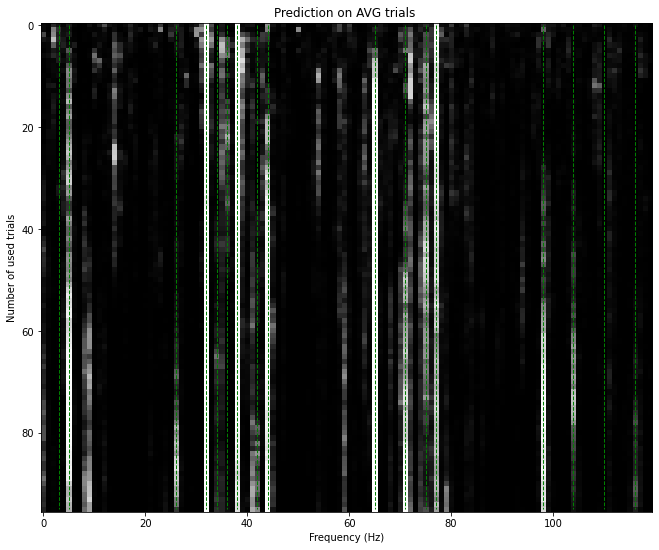

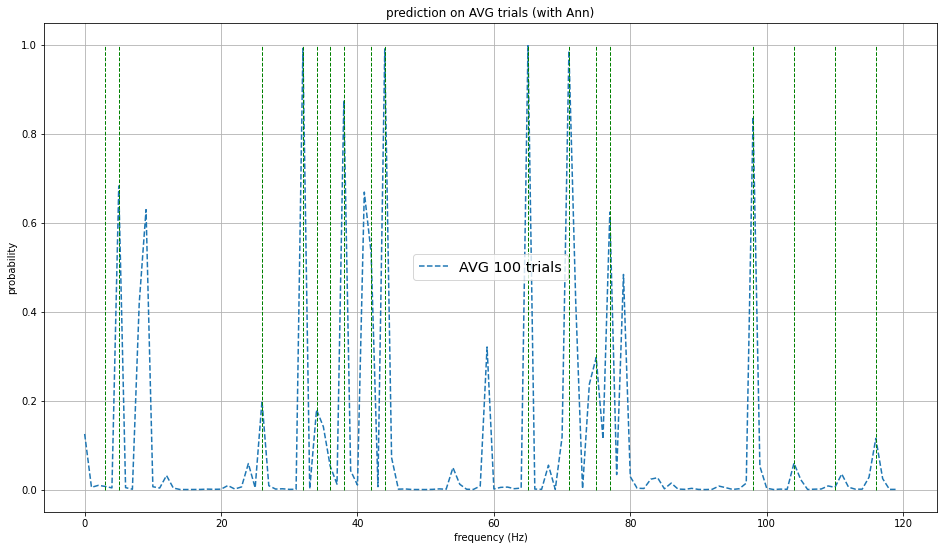

In [ ]:
#%% test (1) the best_trained_model on test set: AVG-EEG on day 2
data1 =  data_test_AVG
data1 =  normalize_matrix_1(data1) # normalize to [0-1]
predictions = model.predict(data1)

plt.figure(figsize=(16, 9))
plt.imshow(predictions, cmap='gray')
plot1bar(labels2plt, L=96)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Number of used trials')
plt.title('Prediction on AVG trials ')

    
# plot probility on AVG-trials: [50, 60, 70, 80, 90, 100]
# nAVG = [50, 60, 70, 80, 90, 100]
nAVG = [ 100]
plt.figure(figsize=(16, 9))
for i in range(len(nAVG)):  
    prediction_on_1AVG = predictions[nAVG[i]-5]
    plt.plot(prediction_on_1AVG, label= 'AVG {} trials'.format(nAVG[i]), linestyle='--')
   
plot1bar(labels2plt, L=2)
plt.grid(True)
plt.xlabel('frequency (Hz)')
plt.ylabel('probability')
plt.title('prediction on AVG trials (with Ann)')
plt.legend(loc='best', fontsize='x-large')
     

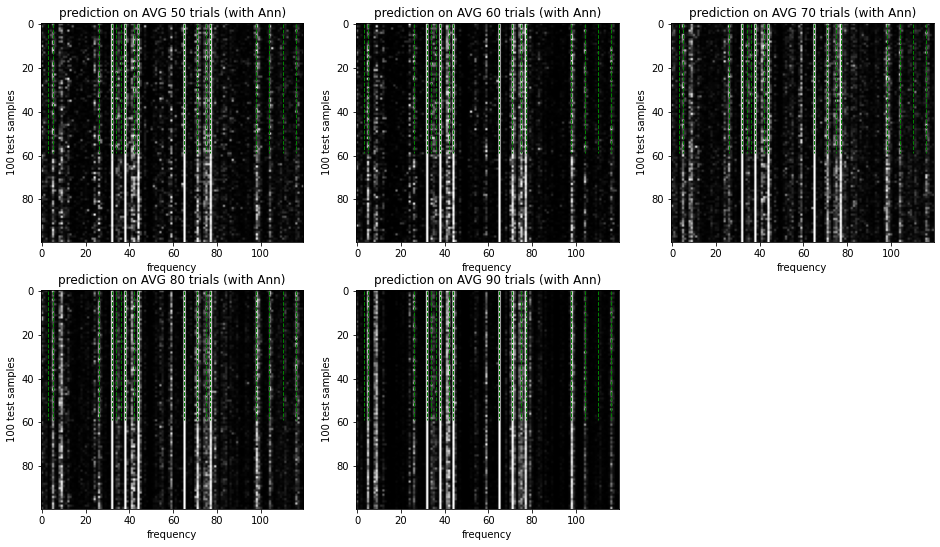

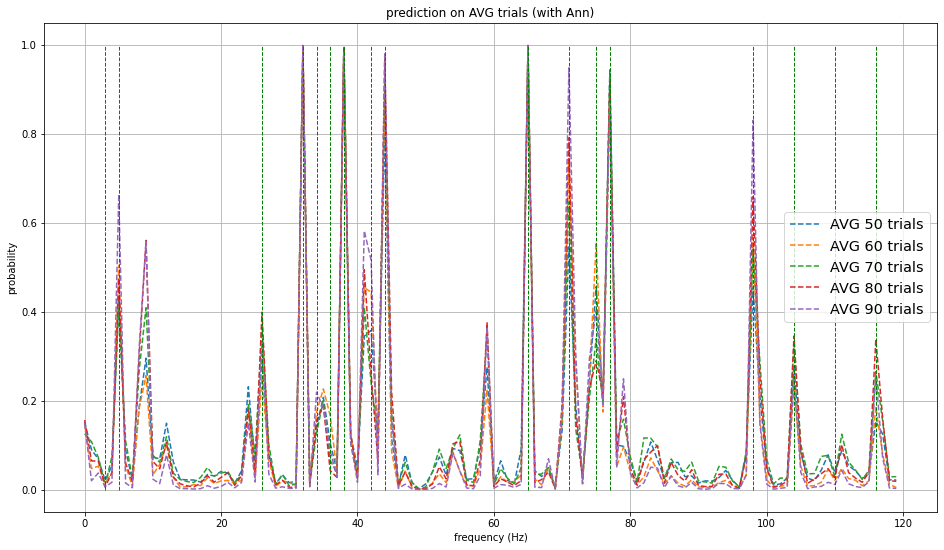

In [ ]:
#%% test (2) the best_trained_model on randomly-selected EEG, ntrials = [50, 60, 70, 80, 90]
data2 =  data_test_ram

ntrials = [50, 60, 70, 80, 90]
plt.figure(figsize=(16, 9))
for i in range(5):  
    x_test2 = data2[0, i] # [50, 60, 70, 80]
    x_test2 =  normalize_matrix_1(x_test2)
    predictions = model.predict(x_test2)
    
    plt.subplot(2,3,i+1)
    plt.imshow(predictions, cmap='gray')
    plot1bar(labels2plt)
    plt.xlabel('frequency')
    plt.ylabel('100 test samples')
    plt.title('prediction on AVG {} trials (with Ann)'.format(ntrials[i]))

    
# plot probility on AVG trials = [50, 60, 70, 80, 90]
plt.figure(figsize=(16, 9))
for i in range(5):  
    x_test2 = data2[0, i] # [50, 60, 70, 80]
    x_test2 =  normalize_matrix_1(x_test2)
    predictions = model.predict(x_test2)
    predictions_mean = np.mean(predictions, axis = 0)
    plt.plot(predictions_mean, label= 'AVG {} trials'.format(ntrials[i]), linestyle='--')
    
plot1bar(labels2plt, L=2)
plt.grid(True)
plt.xlabel('frequency (Hz)')
plt.ylabel('probability')
plt.title('prediction on AVG trials (with Ann)')
plt.legend(loc='best', fontsize='x-large')
    

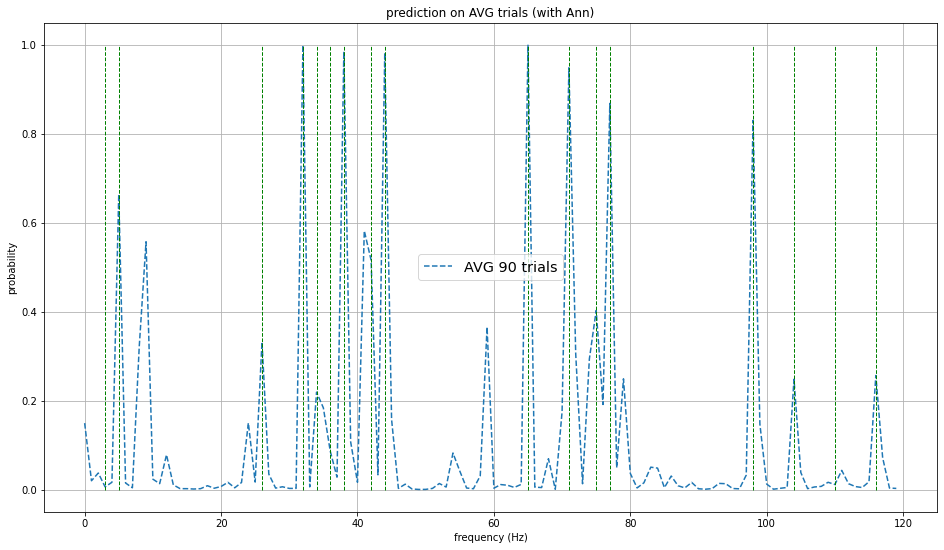

In [ ]:
# plot probility on AVG trials = [50, 60, 70, 80, 90]
plt.figure(figsize=(16, 9))
x_test2 = data2[0, 4]  
x_test2 =  normalize_matrix_1(x_test2)
predictions = model.predict(x_test2)
predictions_mean = np.mean(predictions, axis = 0)
plt.plot(predictions_mean, label= 'AVG 90 trials', linestyle='--')
    
plot1bar(labels2plt, L=2)
plt.grid(True)
plt.xlabel('frequency (Hz)')
plt.ylabel('probability')
plt.title('prediction on AVG trials (with Ann)')
plt.legend(loc='best', fontsize='x-large')

In [ ]:
#%% Matrix from Python to MATLAB (.mat data)
tmp =  normalize_matrix_1(data_test_AVG)
pred_AVG = model.predict(tmp)
mdic = {"predictions_3D": pred_AVG}

save_dir = os.path.join(os.getcwd(), 'mat')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
pred_savename = subj + "_pred.mat"
savemat(os.path.join(save_dir,pred_savename), mdic)